In [136]:
from datetime import datetime
import numpy as np
import math
import scipy.special
from scipy.sparse.csgraph import laplacian as csgraph_laplacian
import random
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans

random.seed(datetime.now())

num_cells = 50
num_groups = 2
num_eigenvectors = 5 # number of eigenvectors to use for spectral clustering

a = np.ones((num_cells,num_cells)) - np.identity(num_cells)
a = a + np.random.uniform(low=-1e-1, high=1e-1, size=(num_cells, num_cells))

for i in range(0, num_cells):
    for j in range(0, i):
        a[i,j] = a[j,i]

a = np.kron(np.eye(num_groups),a) # repeats a num_groups time diagonally to simulate the groups

L = csgraph_laplacian(a, normed=True)

eigenvalues, eigenvectors = np.linalg.eig(L)
idx = eigenvalues.argsort()
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]


cell_coord = eigenvectors[:, range(1, num_eigenvectors+1)]
    # cell_coord = eigenvectors[:,1].reshape(-1,1)
    
for n_components in range(1,4):
    gmm = GaussianMixture(n_components=n_components, n_init=1, random_state=29, init_params='random')
    gmm.fit(cell_coord)
    aic_1 = gmm.aic(cell_coord)
    bic_1 = gmm.bic(cell_coord)
    print(f'aic/bic for GMM{n_components} {aic_1:5.2f} {bic_1:5.2f}')
    print(f'Log likelihood {gmm.score(cell_coord):5.2f}')
    print(f'Probabilities {gmm.predict_proba(cell_coord)}')
    # print(f'Means {gmm.means_}')
    # print(f'Number of parameters for the model: {gmm._n_parameters()}')
    # print(f'Scores per sample: {gmm_1.score_samples(cell_coord)}')
    
sc = SpectralClustering(2, affinity='precomputed', n_init=100, random_state=15, assign_labels='kmeans')
sc.fit(a)
print(f'Spectral clustering results: {sc.labels_}')
    

aic/bic for GMM1 -912.96 -860.86
Log likelihood  4.76
Probabilities [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
aic/bic for GMM2 -3565.77 -3458.95
Log likelihood 18.24
Probabilities [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]


/Users/dd/software/anaconda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


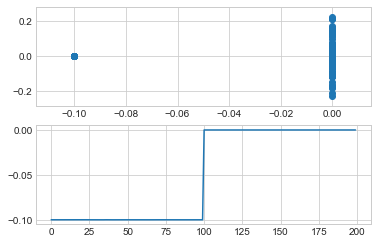

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig, axes = plt.subplots(2)


axes[0].scatter(eigenvectors[:,1], eigenvectors[:,2], marker='o')

x = range(0, eigenvectors.shape[0])
axes[1].plot(x, eigenvectors[:,1])